In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

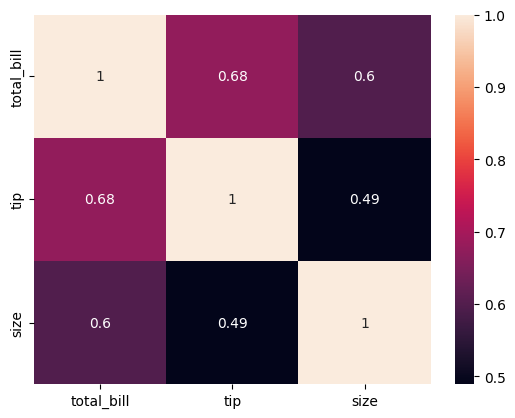

In [2]:
data = sns.load_dataset('tips')
corr_matrix = data.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True)

<Axes: >

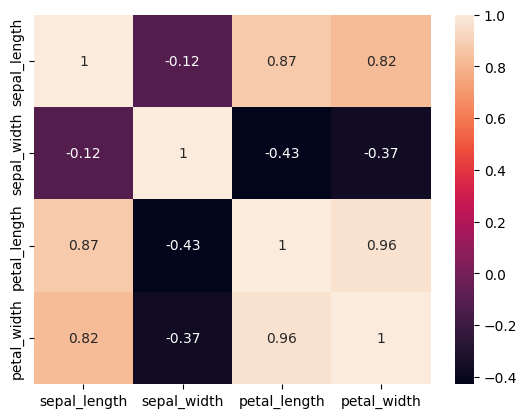

In [3]:
data = sns.load_dataset("iris")
corr = data.corr(numeric_only=True)

sns.heatmap(corr, annot=True)

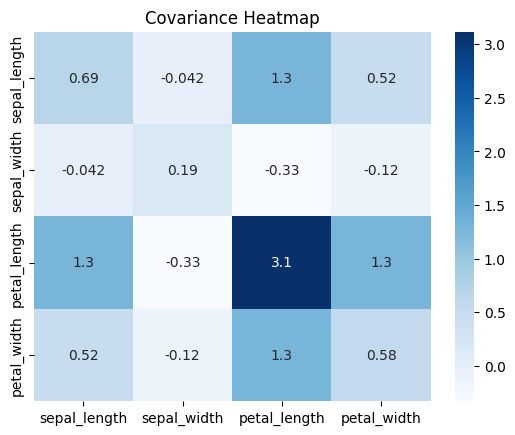

In [4]:
cov_matrix = data.cov(numeric_only=True)
sns.heatmap(cov_matrix, annot=True, cmap="Blues")
plt.title("Covariance Heatmap")
plt.show()


In [5]:
penguins = sns.load_dataset('penguins')

penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

<Axes: >

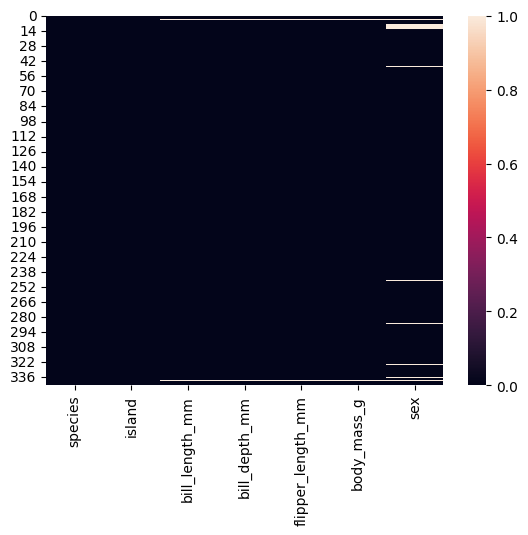

In [6]:
sns.heatmap(penguins.isnull())

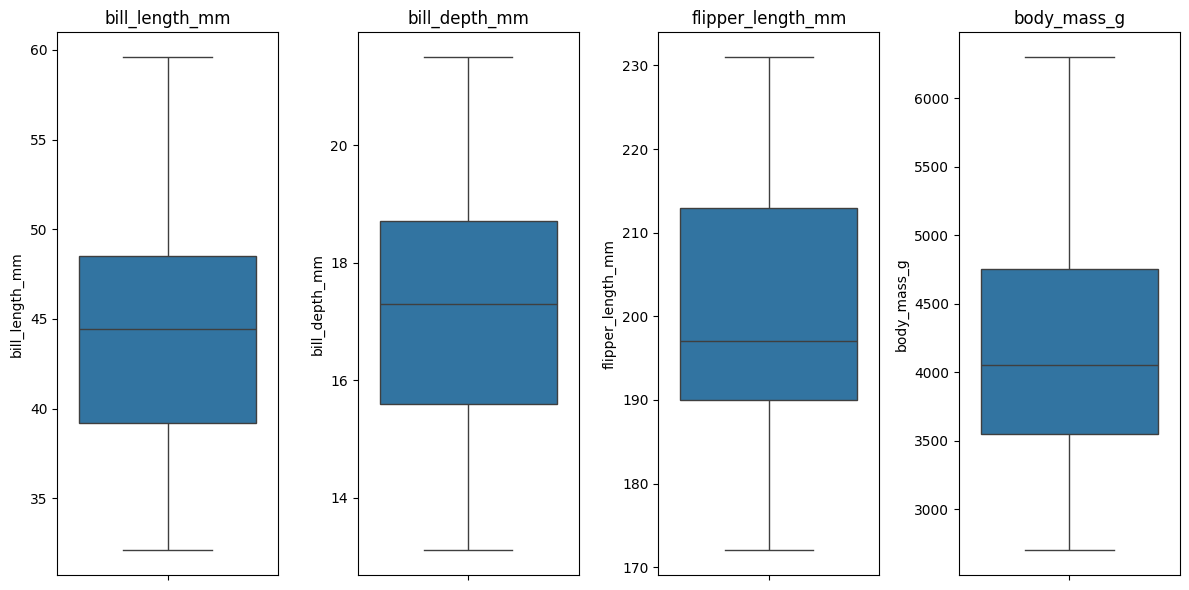

In [7]:
plt.figure(figsize=(12,6))
for i, col in enumerate(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']):
    plt.subplot(1,4,i+1)
    sns.boxplot(y=penguins[col])
    plt.title(col)
plt.tight_layout()
plt.show()


### Feature Engineering and Feature Selection

In [8]:
penguins  = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [9]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [10]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [11]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [14]:
penguins.fillna(penguins.median(numeric_only=True), inplace=True)
penguins['sex'] = penguins['sex'].fillna(penguins['sex'].mode()[0])

In [15]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.50,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.30,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,44.45,17.3,197.0,4050.0,Male
4,Adelie,Torgersen,36.70,19.3,193.0,3450.0,Female


In [16]:
# New feature: bill_area
penguins['bill_area'] = penguins['bill_length_mm'] * penguins['bill_depth_mm']

# One-hot encoding for 'species' and 'sex'
penguins_encoded = pd.get_dummies(penguins, columns=['species', 'sex'], drop_first=True)

print(penguins_encoded.head())


      island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0  Torgersen           39.10           18.7              181.0       3750.0   
1  Torgersen           39.50           17.4              186.0       3800.0   
2  Torgersen           40.30           18.0              195.0       3250.0   
3  Torgersen           44.45           17.3              197.0       4050.0   
4  Torgersen           36.70           19.3              193.0       3450.0   

   bill_area  species_Chinstrap  species_Gentoo  sex_Male  
0    731.170              False           False      True  
1    687.300              False           False     False  
2    725.400              False           False     False  
3    768.985              False           False      True  
4    708.310              False           False     False  
